In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [40]:
data = pd.read_csv('dataassurance.csv')

Nettoyage des données prealables.
verification structure 

In [41]:
description = data.describe()
print(description)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    31.111379     1.094918  13270.422265
std      14.049960    17.558707     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.700000     2.000000  16639.912515
max      64.000000   632.965000     5.000000  63770.428010


Verification presence de doublon

In [42]:
nbr_doublons = data.duplicated().sum()
print(nbr_doublons)

1


In [43]:
doublons = data[data.duplicated()]
print(doublons)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [9]:
data = data.drop_duplicates()  


In [44]:
nbr_doublons = data.duplicated().sum()
print(nbr_doublons)

1


types des données

In [45]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [46]:
description = data.describe
print(description)

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


verification de la validité des bmi et ages

In [47]:
valid_bmi = data[(data['bmi'] > 0) & (data['bmi'] < 100)]
print(valid_bmi)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [48]:
data = valid_bmi
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [49]:
region = data["region"].unique()
print(region)

['southwest' 'southeast' 'northwest' 'northeast']


remplacer les valeurs regions par des valeurs binaires

In [50]:
region_binaire = pd.get_dummies(data['region'], prefix='region').astype(int)
data = pd.concat([data, region_binaire], axis=1)
data.head(10)

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,1,0
6,46,female,33.440,1,no,southeast,8240.58960,0,0,1,0
7,37,female,27.740,3,no,northwest,7281.50560,0,1,0,0
8,37,male,29.830,2,no,northeast,6406.41070,1,0,0,0
9,60,female,25.840,0,no,northwest,28923.13692,0,1,0,0


In [39]:
#data = data.drop(data.columns[7:10], axis=1)
#data

,age,sex,bmi,children,smoker,region,charges,region_southwest,region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,True,1
1,18,1,33.770,1,0,southeast,1725.55230,False,0
2,28,1,33.000,3,0,southeast,4449.46200,False,0
3,33,1,22.705,0,0,northwest,21984.47061,False,0
4,32,1,28.880,0,0,northwest,3866.85520,False,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,False,0
1334,18,0,31.920,0,0,northeast,2205.98080,False,0
1335,18,0,36.850,0,0,southeast,1629.83350,False,0
1336,21,0,25.800,0,0,southwest,2007.94500,True,1


Remplacer les variable string smoker yes = 1 no = 0 
            et male = 1 female = 0

In [52]:
data["sex"] = data["sex"].replace({"male":1, "female":0}).astype(int)
data.head()


,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,yes,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,no,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,no,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,no,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,no,northwest,3866.85520,0,1,0,0


In [54]:
data["smoker"] = data["smoker"].replace({"yes":1, "no":0}).astype(int)
data.head()

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0


analyse des données

matrice de correlations

In [61]:
selection = data[["age", "sex", "bmi", "children", "smoker", "charges", "region_northeast", "region_northwest", "region_southeast", "region_southwest"]]
correlation_matrice = selection.corr()
print(correlation_matrice)

                       age       sex       bmi  children    smoker   charges  \
age               1.000000 -0.019656  0.109023  0.040628 -0.024429  0.299072   
sex              -0.019656  1.000000  0.046607  0.018382  0.075838  0.057461   
bmi               0.109023  0.046607  1.000000  0.012392  0.003750  0.198175   
children          0.040628  0.018382  0.012392  1.000000  0.008282  0.067834   
smoker           -0.024429  0.075838  0.003750  0.008282  1.000000  0.787412   
charges           0.299072  0.057461  0.198175  0.067834  0.787412  1.000000   
region_northeast  0.003165 -0.002854 -0.137987 -0.022163  0.002597  0.006431   
region_northwest -0.002556 -0.009837 -0.136627  0.022766 -0.036321 -0.040208   
region_southeast -0.010912  0.016664  0.270310 -0.022367  0.068282  0.074081   
region_southwest  0.010716 -0.004614 -0.006176  0.022607 -0.037168 -0.043134   

                  region_northeast  region_northwest  region_southeast  \
age                       0.003165         -0

In [62]:
correlation_matrice.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.019656,0.109023,0.040628,-0.024429,0.299072,0.003165,-0.002556,-0.010912,0.010716
sex,-0.019656,1.000000,0.046607,0.018382,0.075838,0.057461,-0.002854,-0.009837,0.016664,-0.004614
bmi,0.109023,0.046607,1.000000,0.012392,0.003750,0.198175,-0.137987,-0.136627,0.270310,-0.006176
children,0.040628,0.018382,0.012392,1.000000,0.008282,0.067834,-0.022163,0.022766,-0.022367,0.022607
smoker,-0.024429,0.075838,0.003750,0.008282,1.000000,0.787412,0.002597,-0.036321,0.068282,-0.037168
charges,0.299072,0.057461,0.198175,0.067834,0.787412,1.000000,0.006431,-0.040208,0.074081,-0.043134
region_northeast,0.003165,-0.002854,-0.137987,-0.022163,0.002597,0.006431,1.000000,-0.319842,-0.345909,-0.320493
region_northwest,-0.002556,-0.009837,-0.136627,0.022766,-0.036321,-0.040208,-0.319842,1.000000,-0.345909,-0.320493
region_southeast,-0.010912,0.016664,0.270310,-0.022367,0.068282,0.074081,-0.345909,-0.345909,1.000000,-0.346614
region_southwest,0.010716,-0.004614,-0.006176,0.022607,-0.037168,-0.043134,-0.320493,-0.320493,-0.346614,1.000000


analyse graphique

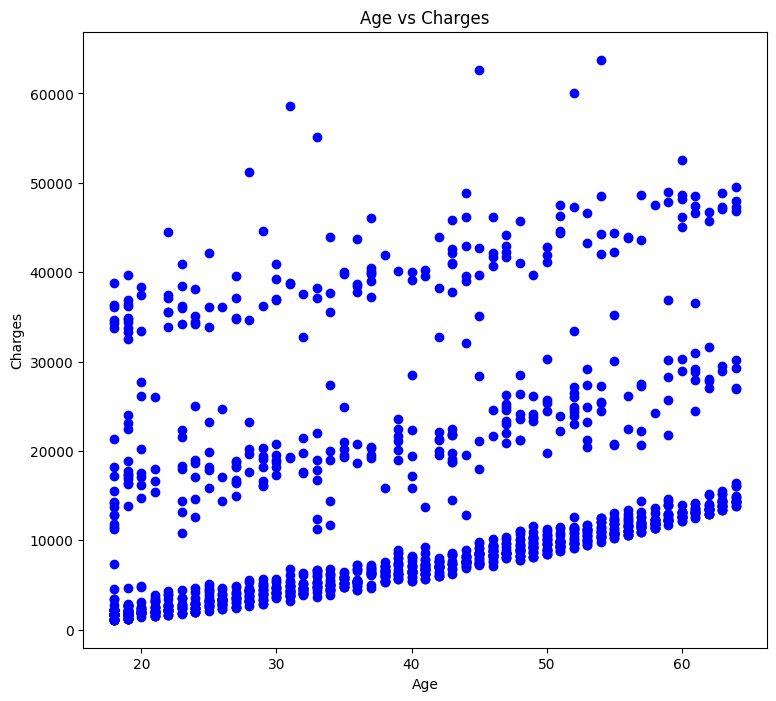

In [75]:
plt.figure(figsize=(30, 8))

plt.subplot(1, 3, 1)
plt.scatter(data['age'], data['charges'], c='blue')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.show()



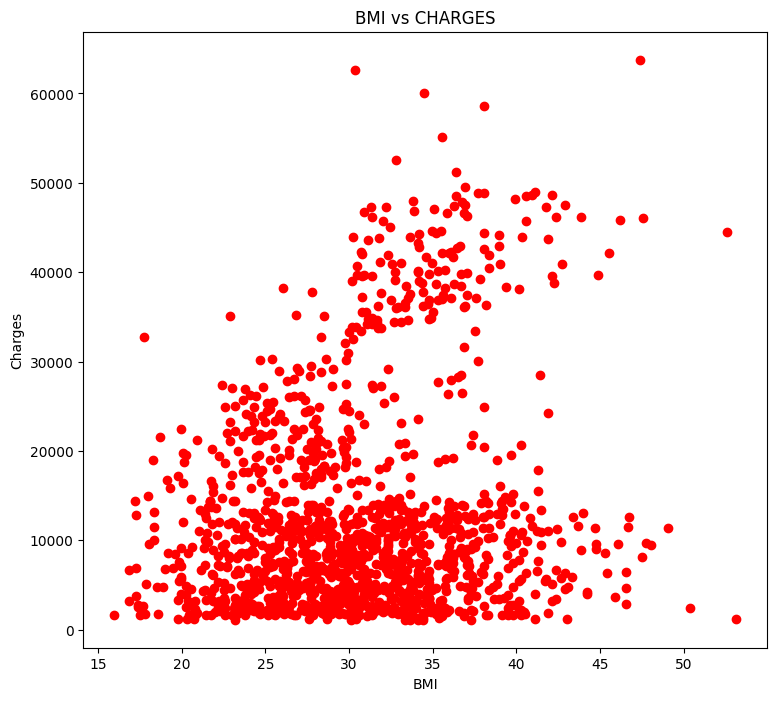

In [77]:

plt.figure(figsize=(30, 8))

plt.subplot(1, 3, 1)
plt.scatter(data['bmi'], data['charges'], c='red')
plt.title('BMI vs CHARGES')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.show()

division des imc en categorie

In [82]:
limites = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
categories_imc = ["sous-poids", "poids normal", "surpoids", "obésité modérée", "obésité sévère", "obésité morbide"]
data["categorie_imc"] = pd.cut(data["bmi"], limites, labels=categories_imc)
data.head()


,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,categorie_imc
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1,surpoids
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0,obésité modérée
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0,obésité modérée
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0,poids normal
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0,surpoids


histogramme des prix moyens des assurances par profil.

In [ ]:
homme_nonfumeur_imcsouspoids = data[(data["sex"] == 1) & (data["smoker"] == 0) & (data["categorie_imc"] == "sous-poids")]
homme_nonfumeur_imcnormal = data[(data["sex"] == 1) & (data["smoker"] == 0) & (data["categorie_imc"] == "poids normal")]
homme_nonfumeur_imcobesitémodéré = data[(data["sex"] == 1) & (data["smoker"] == 0) & (data["categorie_imc"] == "obésité modérée")]
homme_nonfumeur_imcobésitésevère = data[(data["sex"] == 1) & (data["smoker"] == 0) & (data["categorie_imc"] == "obésité sévère")]
homme_nonfumeur_imcobésitémorbide = data[(data["sex"] == 1) & (data["smoker"] == 0) & (data["categorie_imc"] == "obésité morbide")]
homme_fumeur_imcsouspoids = data[(data["sex"] == 1) & (data["smoker"] == 1) & (data["categorie_imc"] == "sous-poids")]
homme_fumeur_imcnormal = data[(data["sex"] == 1) & (data["smoker"] == 1) & (data["categorie_imc"] == "poids normal")]
homme_fumeur_imcobesitémodere = data[(data["sex"] == 1) & (data["smoker"] == 1) & (data["categorie_imc"] == "obésité modérée")]
homme_fumeur_imcobesitésevère = data[(data["sex"] == 1) & (data["smoker"] == 1) & (data["categorie_imc"] == "obésité sévère")]
homme_fumeur_imcobesitémorbide = data[(data["sex"] == 1) & (data["smoker"] == 1) & (data["categorie_imc"] == "obésité morbide")]



In [90]:
moyenne_homme_nonfumeur_imcsouspoids = homme_nonfumeur_imcsouspoids["charges"].mean()
moyenne_homme_nonfumeur_imcnormal = homme_nonfumeur_imcnormal["charges"].mean()
moyenne_homme_nonfumeur_imcobesitémodéré = homme_nonfumeur_imcobesitémodéré["charges"].mean()
moyenne_homme_nonfumeur_imcobésitésevère = homme_nonfumeur_imcobésitésevère["charges"].mean()
moyenne_homme_nonfumeur_imcobésitémorbide = homme_nonfumeur_imcobésitémorbide["charges"].mean()
moyenne_homme_fumeur_imcsouspoids = homme_fumeur_imcsouspoids["charges"].mean()
moyenne_homme_fumeur_imcnormal = homme_fumeur_imcnormal["charges"].mean()
moyenne_homme_fumeur_imcobesitémodere = homme_fumeur_imcobesitémodere["charges"].mean()
moyenne_homme_fumeur_imcobesitésevère = homme_fumeur_imcobesitésevère["charges"].mean()
moyenne_homme_fumeur_imcobesitémorbide = homme_fumeur_imcobesitémorbide["charges"].mean()

In [92]:
categories = ["homme_nonfumeur_imcsouspoids", "homme_nonfumeur_imcnormal", "homme_nonfumeur_imcobesitémodéré", "homme_nonfumeur_imcobésitésevère", "homme_nonfumeur_imcobésitémorbide", "homme_fumeur_imcsouspoids", "homme_fumeur_imcnormal", "homme_fumeur_imcobesitémodere", "homme_fumeur_imcobesitésevère", "homme_fumeur_imcobesitémorbide"]
moyennes = [moyenne_homme_nonfumeur_imcsouspoids, moyenne_homme_nonfumeur_imcnormal, moyenne_homme_nonfumeur_imcobesitémodéré, moyenne_homme_nonfumeur_imcobésitésevère, moyenne_homme_nonfumeur_imcobésitémorbide, moyenne_homme_fumeur_imcsouspoids, moyenne_homme_fumeur_imcnormal, moyenne_homme_fumeur_imcobesitémodere, moyenne_homme_fumeur_imcobesitésevère, moyenne_homme_fumeur_imcobesitémorbide]

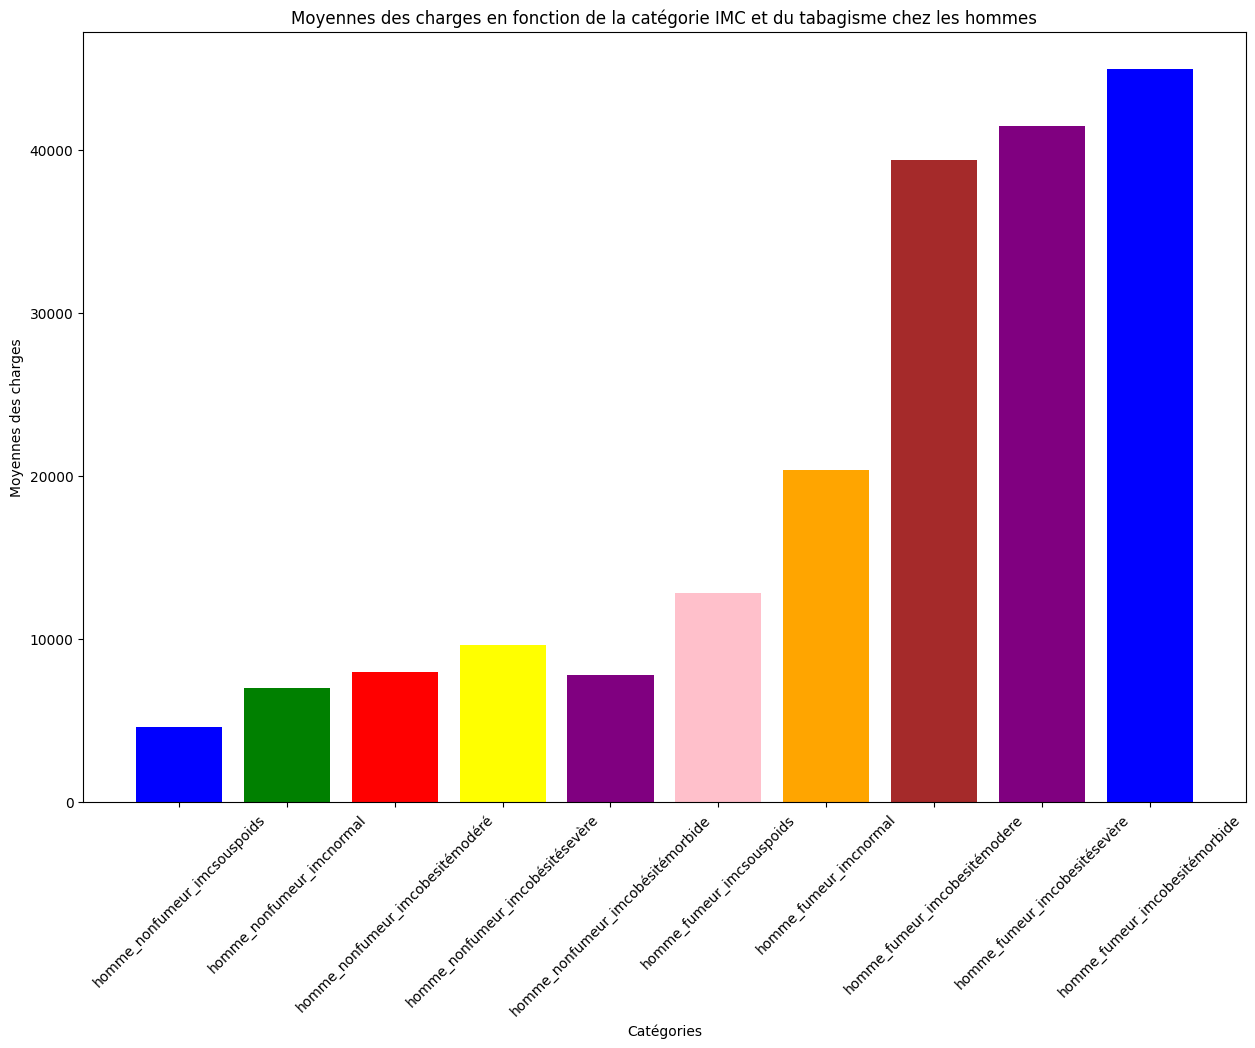

In [95]:

plt.figure(figsize=(15, 10))
plt.bar(categories, moyennes, color=['blue', "green", "red", "yellow", "purple", "pink", "orange", "brown", "purple"])
plt.xlabel('Catégories')
plt.ylabel('Moyennes des charges')
plt.title('Moyennes des charges en fonction de la catégorie IMC et du tabagisme chez les hommes')
plt.xticks(rotation=45)
plt.show()

sauvegarde du dataframe nettoyé analysé.

In [96]:
data.to_csv("data_cleaned.csv", index=False)